In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('datasets/marketing_campaign.csv')
df.sample(5).T

,1288,936,1830,1241,1857
ID,9010,1628,6859,1921,5316
Year_Birth,1972,1971,1987,1967,1976
Education,Master,Graduation,Graduation,PhD,Master
Marital_Status,Married,Together,Single,Married,Together
Income,83151.0,71796.0,29236.0,59062.0,21024.0
Kidhome,0,0,1,2,0
Teenhome,0,0,0,1,0
Dt_Customer,10/02/13,24/10/13,08/10/13,03/10/13,04/07/13
Recency,80,54,30,74,89
MntWines,968,354,37,46,36


# Data Preparation and Cleaning

In [3]:
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Dataset has 2240 rows and 29 columns


In [4]:
df.drop(columns=['ID', 'Education', 'Marital_Status',
                    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                    'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response'],
                    inplace=True)
df.head().T

,0,1,2,3,4
Year_Birth,1957,1954,1965,1984,1981
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04/09/12,08/03/14,21/08/13,10/02/14,19/01/14
Recency,58,38,26,26,94
MntWines,635,11,426,11,173
MntFruits,88,1,49,4,43
MntMeatProducts,546,6,127,20,118
MntFishProducts,172,2,111,10,46


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Dt_Customer          2240 non-null   object 
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [6]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d/%m/%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Income               2216 non-null   float64       
 2   Kidhome              2240 non-null   int64         
 3   Teenhome             2240 non-null   int64         
 4   Dt_Customer          2240 non-null   datetime64[ns]
 5   Recency              2240 non-null   int64         
 6   MntWines             2240 non-null   int64         
 7   MntFruits            2240 non-null   int64         
 8   MntMeatProducts      2240 non-null   int64         
 9   MntFishProducts      2240 non-null   int64         
 10  MntSweetProducts     2240 non-null   int64         
 11  MntGoldProds         2240 non-null   int64         
 12  NumDealsPurchases    2240 non-null   int64         
 13  NumWebPurchases      2240 non-nul

In [7]:
df.isnull().sum()

Year_Birth              0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Z_CostContact           0
Z_Revenue               0
dtype: int64

In [8]:
df.dropna(inplace=True)
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')
df.isnull().sum()

Dataset has 2216 rows and 19 columns


Year_Birth             0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Z_CostContact          0
Z_Revenue              0
dtype: int64

In [9]:
df['Total_amount_spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + \
                            df['MntSweetProducts'] + df['MntGoldProds']

df['Total_Children'] = df['Kidhome'] + df['Teenhome']

df['Customer_purchases_webvisits'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + \
                                        df['NumStorePurchases'] + df['NumWebVisitsMonth']

In [10]:
df.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                    'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                    'NumWebVisitsMonth'], inplace=True)
df.head().T

,0,1,2,3,4
Year_Birth,1957,1954,1965,1984,1981
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Dt_Customer,2012-09-04 00:00:00,2014-03-08 00:00:00,2013-08-21 00:00:00,2014-02-10 00:00:00,2014-01-19 00:00:00
Recency,58,38,26,26,94
Z_CostContact,3,3,3,3,3
Z_Revenue,11,11,11,11,11
Total_amount_spent,1617,27,776,53,422
Total_Children,0,2,0,1,1
Customer_purchases_webvisits,32,11,25,14,24


In [11]:
dt = pd.to_datetime('2020/12/31', format='%Y/%m/%d')
df['Length_of_Association'] = (dt - df['Dt_Customer']).dt.days
df.sample(5).T

,2141,1324,1912,1473,1703
Year_Birth,1971,1974,1971,1969,1973
Income,35788.0,18393.0,80573.0,94871.0,55012.0
Dt_Customer,2014-01-23 00:00:00,2014-03-29 00:00:00,2012-10-14 00:00:00,2012-09-01 00:00:00,2014-03-21 00:00:00
Recency,34,2,85,99,85
Z_CostContact,3,3,3,3,3
Z_Revenue,11,11,11,11,11
Total_amount_spent,44,50,1564,1078,660
Total_Children,2,1,0,2,1
Customer_purchases_webvisits,13,16,26,25,30
Length_of_Association,2534,2469,3000,3043,2477


In [12]:
df['Length_of_Association'] = (df['Length_of_Association']/30).astype(int)
df.drop(columns=['Dt_Customer'], inplace=True)
df.head().T

,0,1,2,3,4
Year_Birth,1957.0,1954.0,1965.0,1984.0,1981.0
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Recency,58.0,38.0,26.0,26.0,94.0
Z_CostContact,3.0,3.0,3.0,3.0,3.0
Z_Revenue,11.0,11.0,11.0,11.0,11.0
Total_amount_spent,1617.0,27.0,776.0,53.0,422.0
Total_Children,0.0,2.0,0.0,1.0,1.0
Customer_purchases_webvisits,32.0,11.0,25.0,14.0,24.0
Length_of_Association,101.0,83.0,89.0,83.0,84.0


In [13]:
df['Age'] = 2021 - df['Year_Birth']
df.drop(columns=['Year_Birth'], inplace=True)

In [14]:
df.head().T

,0,1,2,3,4
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Recency,58.0,38.0,26.0,26.0,94.0
Z_CostContact,3.0,3.0,3.0,3.0,3.0
Z_Revenue,11.0,11.0,11.0,11.0,11.0
Total_amount_spent,1617.0,27.0,776.0,53.0,422.0
Total_Children,0.0,2.0,0.0,1.0,1.0
Customer_purchases_webvisits,32.0,11.0,25.0,14.0,24.0
Length_of_Association,101.0,83.0,89.0,83.0,84.0
Age,64.0,67.0,56.0,37.0,40.0


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.0,99.0
Z_CostContact,2216.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
Z_Revenue,2216.0,11.000000,0.000000,11.0,11.0,11.0,11.0,11.0
Total_amount_spent,2216.0,607.075361,602.900476,5.0,69.0,396.5,1048.0,2525.0
Total_Children,2216.0,0.947202,0.749062,0.0,0.0,1.0,1.0,3.0
Customer_purchases_webvisits,2216.0,20.199910,7.283193,0.0,14.0,19.0,25.0,46.0
Length_of_Association,2216.0,90.539711,6.762415,79.0,85.0,91.0,96.0,102.0
Age,2216.0,52.179603,11.985554,25.0,44.0,51.0,62.0,128.0


In [16]:
# Dropping columns with low variance
df.drop(columns=['Total_Children', 'Z_CostContact', 'Z_Revenue'], inplace=True)
df.head().T

,0,1,2,3,4
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Recency,58.0,38.0,26.0,26.0,94.0
Total_amount_spent,1617.0,27.0,776.0,53.0,422.0
Customer_purchases_webvisits,32.0,11.0,25.0,14.0,24.0
Length_of_Association,101.0,83.0,89.0,83.0,84.0
Age,64.0,67.0,56.0,37.0,40.0


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.0,99.0
Total_amount_spent,2216.0,607.075361,602.900476,5.0,69.0,396.5,1048.0,2525.0
Customer_purchases_webvisits,2216.0,20.199910,7.283193,0.0,14.0,19.0,25.0,46.0
Length_of_Association,2216.0,90.539711,6.762415,79.0,85.0,91.0,96.0,102.0
Age,2216.0,52.179603,11.985554,25.0,44.0,51.0,62.0,128.0


# Data Exploration and Visualization

<AxesSubplot:ylabel='Age'>

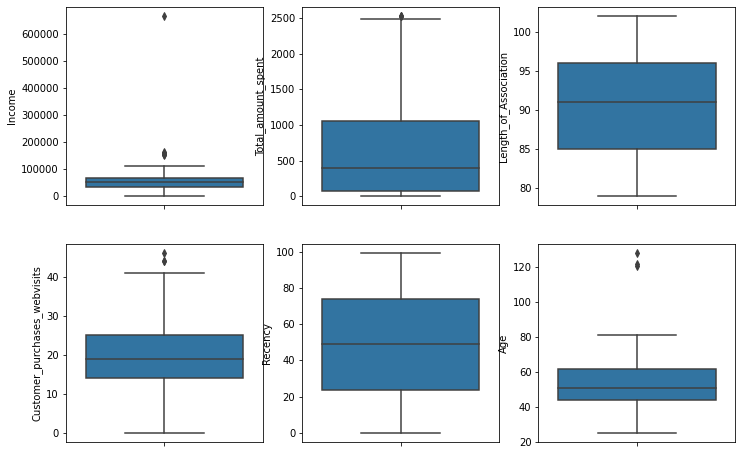

In [19]:
fig, axs = plt.subplots(figsize=(12, 8), nrows=2, ncols=3, sharey=False)
sns.boxplot(y=df['Income'], ax=axs[0][0])
sns.boxplot(y=df['Total_amount_spent'], ax=axs[0][1])
sns.boxplot(y=df['Length_of_Association'], ax=axs[0][2])
sns.boxplot(y=df['Customer_purchases_webvisits'], ax=axs[1][0])
sns.boxplot(y=df['Recency'], ax=axs[1][1])
sns.boxplot(y=df['Age'], ax=axs[1][2])

In [20]:
# Removing outliers as k-means clustering is not suitable for outliers

df['Customer_purchases_webvisits'].clip(
    lower=df['Customer_purchases_webvisits'].quantile(0.05),
    upper=df['Customer_purchases_webvisits'].quantile(0.95),
    inplace=True
)
df['Total_amount_spent'].clip(
    lower=df['Total_amount_spent'].quantile(0.05),
    upper=df['Total_amount_spent'].quantile(0.95),
    inplace=True
)
df['Income'].clip(
    lower=df['Income'].quantile(0.05),
    upper=df['Income'].quantile(0.95),
    inplace=True
)
df['Age'].clip(
    lower=df['Age'].quantile(0.05),
    upper=df['Age'].quantile(0.95),
    inplace=True
)

<AxesSubplot:ylabel='Age'>

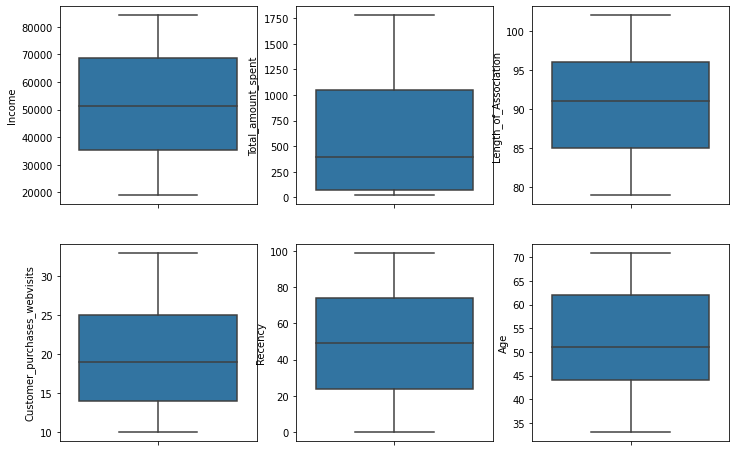

In [21]:
fig, axs = plt.subplots(figsize=(12, 8), nrows=2, ncols=3, sharey=False)
sns.boxplot(y=df['Income'], ax=axs[0][0])
sns.boxplot(y=df['Total_amount_spent'], ax=axs[0][1])
sns.boxplot(y=df['Length_of_Association'], ax=axs[0][2])
sns.boxplot(y=df['Customer_purchases_webvisits'], ax=axs[1][0])
sns.boxplot(y=df['Recency'], ax=axs[1][1])
sns.boxplot(y=df['Age'], ax=axs[1][2])

<AxesSubplot:xlabel='Income', ylabel='Total_amount_spent'>

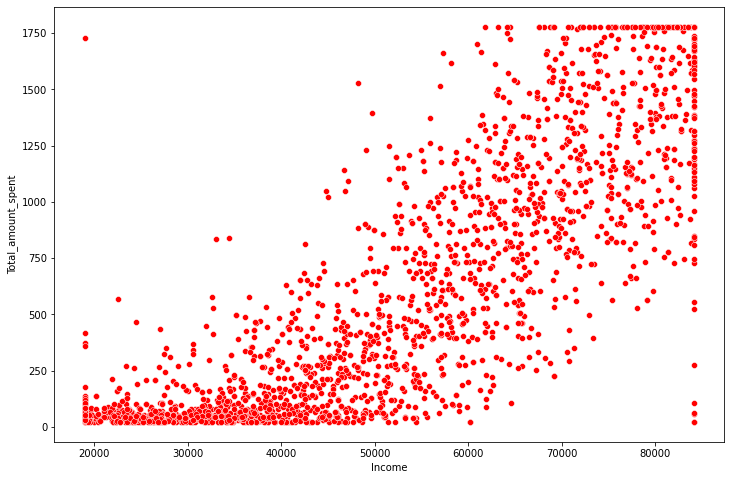

In [22]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='Total_amount_spent', data=df, color='r')

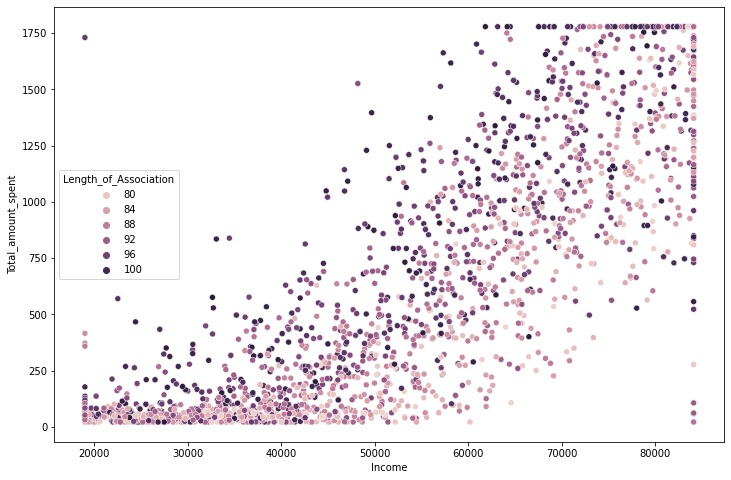

In [24]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='Total_amount_spent', data=df,
                    hue='Length_of_Association');

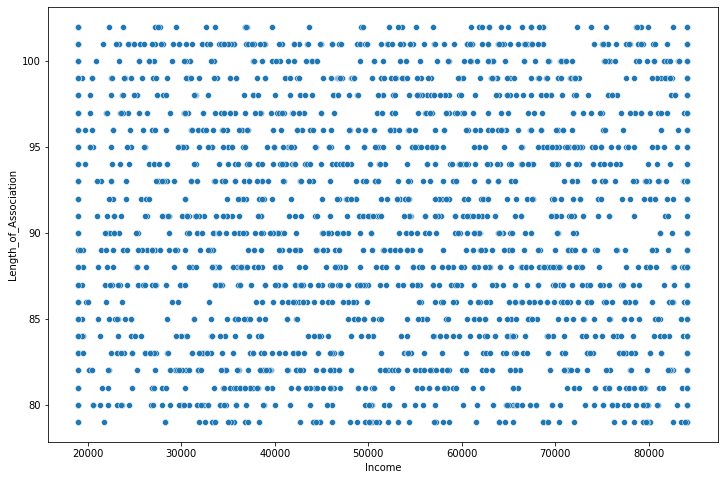

In [25]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', data=df,
                    y='Length_of_Association');

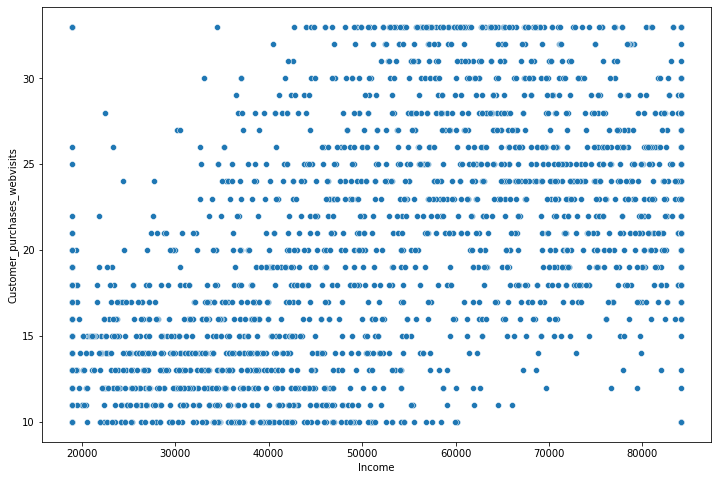

In [26]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', data=df,
                    y='Customer_purchases_webvisits');

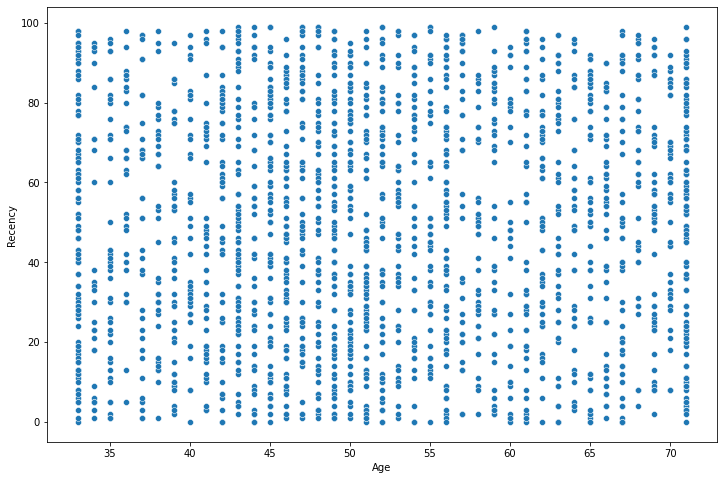

In [27]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', data=df,
                    y='Recency');

In [28]:
fig = px.scatter_3d(df, x='Length_of_Association', z='Total_amount_spent', y='Income')
fig.show()

In [29]:
df[['Length_of_Association', 'Total_amount_spent', 'Income']]\
    .to_csv('datasets/preprocessed_data.csv', index=False)

# Data Preprocessing

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, normalize

In [31]:
df = pd.read_csv('datasets/preprocessed_data.csv')
df.head()

,Length_of_Association,Total_amount_spent,Income
0,101,1617.0,58138.0
1,83,27.0,46344.0
2,89,776.0,71613.0
3,83,53.0,26646.0
4,84,422.0,58293.0


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length_of_Association,2216.0,90.539711,6.762415,79.0,85.0,91.0,96.0,102.00
Total_amount_spent,2216.0,595.727775,575.677268,22.0,69.0,396.5,1048.0,1778.25
Income,2216.0,51751.716832,19773.406544,18985.5,35303.0,51381.5,68522.0,84130.00


In [33]:
scaler = StandardScaler()
X_std = pd.DataFrame(data=scaler.fit_transform(df), columns=df.columns)
X_std.describe().T

,count,mean,std,min,25%,50%,75%,max
Length_of_Association,2216.0,-8.456934e-17,1.000226,-1.706834,-0.819376,0.068081,0.807629,1.695086
Total_amount_spent,2216.0,-3.657323e-18,1.000226,-0.996839,-0.915177,-0.346154,0.785812,2.054605
Income,2216.0,1.361163e-16,1.000226,-1.657459,-0.832048,-0.018727,0.848315,1.637836


In [34]:
X = pd.DataFrame(data=normalize(X_std, norm='l2'), columns=X_std.columns)
X.head()

,Length_of_Association,Total_amount_spent,Income
0,0.651090,0.746727,0.135946
1,-0.736150,-0.652287,-0.180570
2,-0.211510,0.290900,0.933081
3,-0.576218,-0.487233,-0.656183
4,-0.907444,-0.283174,0.310416


<AxesSubplot:xlabel='Income', ylabel='Length_of_Association'>

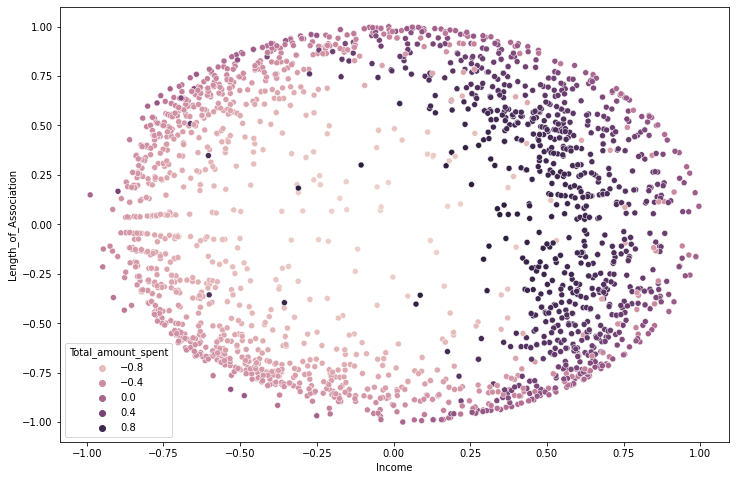

In [36]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income',
                y='Length_of_Association',
                hue='Total_amount_spent', data=X)

# Clustering

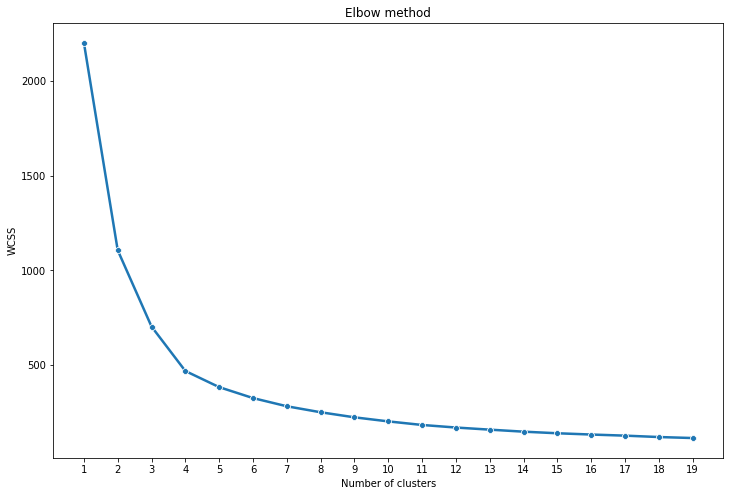

In [37]:
weighted_cluster_sum_of_squares = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    weighted_cluster_sum_of_squares.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
sns.lineplot(x=range(1, 20), y=weighted_cluster_sum_of_squares,
                palette='tab10', linewidth=2.5, marker='8')

plt.xlabel('Number of clusters')
plt.xticks(np.arange(1, 20, 1))

plt.ylabel('WCSS')
plt.title('Elbow method')
plt.show();

In [39]:
silhoutte_avg = dict()
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    silhoutte_avg[k] = silhouette_score(X, kmeans.labels_)
print(silhoutte_avg)


{2: 0.47043961894983743, 3: 0.46696618555260055, 4: 0.4683471975585075, 5: 0.4355681901425067, 6: 0.41622086505846667, 7: 0.39656374538551326, 8: 0.40798233536535927, 9: 0.38161707485431245, 10: 0.3692557621703756, 11: 0.38259514017316265, 12: 0.3693466969028372, 13: 0.3704413090360996, 14: 0.36259231397690234, 15: 0.34898791066941, 16: 0.33768782788024243, 17: 0.3320589021031126, 18: 0.34385989414103835, 19: 0.3459948231854232}


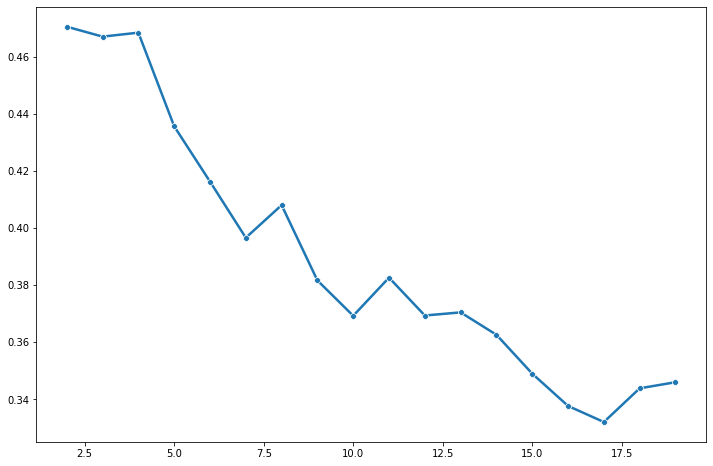

In [40]:
plt.figure(figsize=(12, 8))
sns.lineplot(x=list(silhoutte_avg.keys()), y=list(silhoutte_avg.values()),
                palette='tab10', linewidth=2.5, marker='8')
plt.show();

In [41]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)
X['cluster'] = kmeans.labels_
X.head()

,Length_of_Association,Total_amount_spent,Income,cluster
0,0.651090,0.746727,0.135946,1
1,-0.736150,-0.652287,-0.180570,3
2,-0.211510,0.290900,0.933081,2
3,-0.576218,-0.487233,-0.656183,3
4,-0.907444,-0.283174,0.310416,2


# Visualizing Clusters

In [42]:
X.groupby('cluster').mean()

,Length_of_Association,Total_amount_spent,Income
cluster,,,
0,0.546616,-0.490208,-0.496422
1,0.522807,0.553998,0.468234
2,-0.498993,0.395942,0.595593
3,-0.553556,-0.561632,-0.424636


In [43]:
centers = kmeans.cluster_centers_
centers

array([[ 0.54661603, -0.49020768, -0.49642203],
       [ 0.52280683,  0.55399791,  0.4682336 ],
       [-0.49899326,  0.39594229,  0.5955929 ],
       [-0.55355614, -0.56163158, -0.4246355 ]])

In [44]:
df['cluster'] = kmeans.labels_
df.groupby('cluster').mean()

,Length_of_Association,Total_amount_spent,Income
cluster,,,
0,96.191304,187.433043,35537.686957
1,96.626415,1214.864623,68643.659434
2,84.816631,1047.557569,71769.793177
3,84.633956,120.211838,37704.769470


<AxesSubplot:xlabel='Income', ylabel='Length_of_Association'>

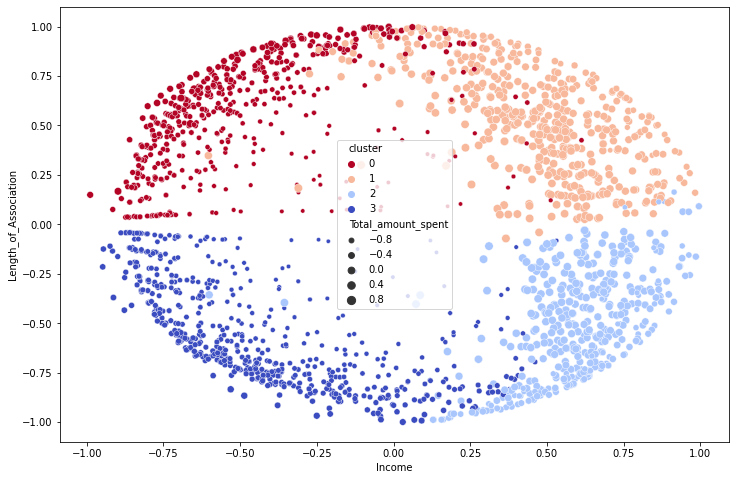

In [46]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='Income',
                    y='Length_of_Association',
                    size='Total_amount_spent',
                    hue='cluster', data=X,
                    palette='coolwarm_r')


<AxesSubplot:xlabel='Income', ylabel='Length_of_Association'>

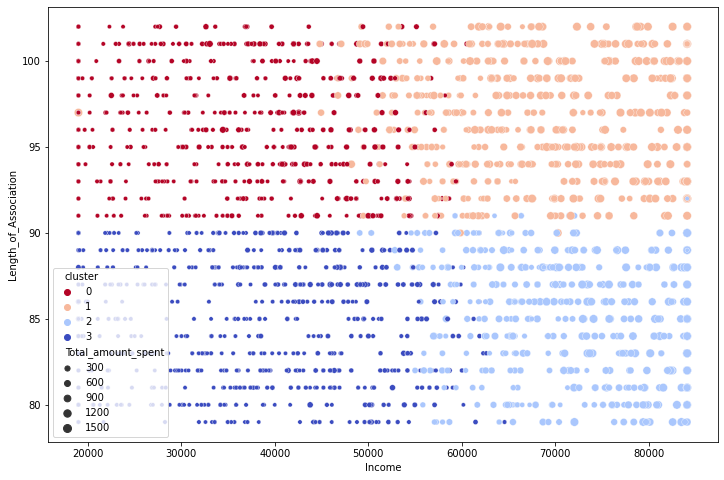

In [47]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='Income',
                    y='Length_of_Association',
                    size='Total_amount_spent',
                    hue='cluster', data=df,
                    palette='coolwarm_r')


In [48]:
fig = px.scatter_3d(df, x='Length_of_Association', z='Total_amount_spent', y='Income',
                    color='cluster')
fig.show()

In [49]:
fig = px.scatter_3d(X, x='Length_of_Association', z='Total_amount_spent', y='Income',
                    color='cluster')
fig.show()